<a href="https://colab.research.google.com/github/chu-ise/413A-2022/blob/main/homework/HW02/02-covid-spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework #2-2

> **Due date: April 7, 2022**


## Estimation of COVID-19 Pandemic

### Loading Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

We can load the most recent data directly from GitHub using `pd.read_csv`.

In [4]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet

infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

Let's now load the data for infected individuals and see how the data looks like:

In [5]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


We can see that each row of the table defines the number of infected individuals for each country and/or province, and columns correspond to dates. Similar tables can be loaded for other data, such as number of recovered and number of deaths.

In [11]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Making Sense of the Data

From the table above the role of province column is not clear. Let's see the different values that are present in `Province/State` column:

In [6]:
# put your code

Gansu            1
Tasmania         1
Guadeloupe       1
Chongqing        1
Unknown          1
                ..
Fujian           1
Alberta          1
Bermuda          1
Cook Islands     1
Faroe Islands    1
Name: Province/State, Length: 89, dtype: int64

From the names we can deduce that countries like Australia and China have more detailed breakdown by provinces. Let's look for information on China to see the example:

In [7]:
# put your code

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
9,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,59881,60654,61857,63148,64219,65341,66267,67243,68257,69571
10,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1470546,1481203,1511588,1531630,1551598,1570591,1587348,1602275,1623168,1647233
11,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,45059,45354,45469,45690,45948,46037,46188,46360,46701,47004
12,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,628403,633972,640104,647290,653383,660484,666182,672275,681130,691564
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,180412,183191,183191,186743,191573,196308,200353,207490,211176,211753
14,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,58670,60041,61906,63858,65632,67175,68379,69526,71353,73342
15,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1128912,1136213,1145594,1155302,1164338,1171910,1178430,1185768,1195179,1205650
16,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,51023,51081,56309,69505,75641,81438,86991,92431,99467,107870


## Pre-processing the Data 

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info for the whole country. This can be done using `groupby`:

In [12]:
# put your code

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058


You can see that due to using `groupby` all DataFrames are now indexed by Country/Region. We can thus access the data for a specific country by using `.loc`:|

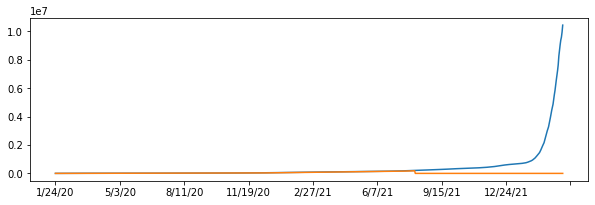

In [21]:
# put your code

> **Note** how we use `[2:]` to remove first two elements of a sequence that contain geolocation of a country. We can also drop those two columns altogether:

## Investigating the Data

Let's now switch to investigating a specific country. Let's create a frame that contains the data on infections indexed by date:

In [26]:
# put your code

,infected,recovered,deaths
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,3,0,0
...,...,...,...
2022-03-18,9038938,0,12101
2022-03-19,9373646,0,12428
2022-03-20,9582815,0,12757
2022-03-21,9936540,0,13141


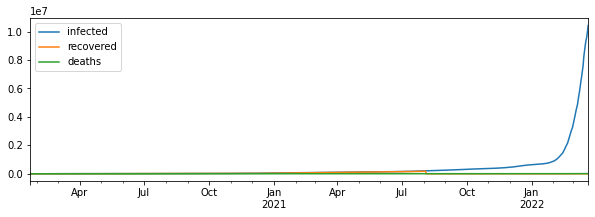

In [27]:
# put your code

Now let's compute the number of new infected people each day. This will allow us to see the speed at which pandemic progresses. The easiest day to do it is to use `diff`:

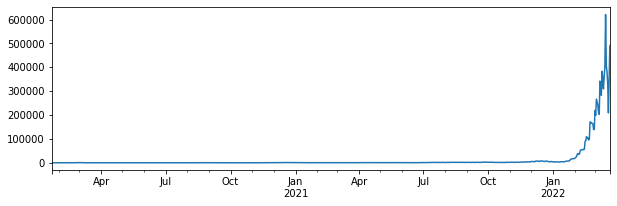

In [28]:
# put your code

We can see high fluctuations in data. Let's look closer at one of the months:

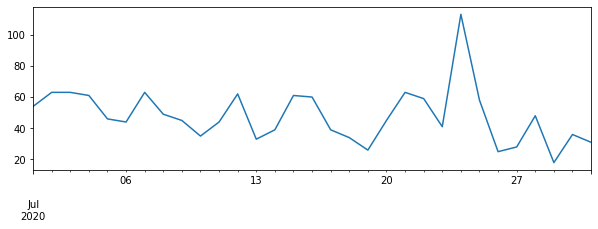

In [29]:
# put your code

It clearly looks like there are weekly fluctuations in data. Because we want to be able to see the trends, it makes sense to smooth out the curve by computing running average (i.e. for each day we will compute the average value of the previous several days):

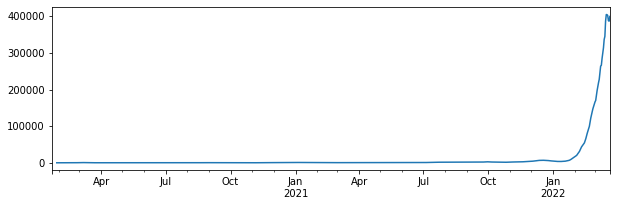

In [30]:
# put your code

In order to be able to compare several countries, we might want to take the country's population into account, and compare the percentage of infected individuals with respect to country's population. In order to get country's population, let's load the dataset of countries:

In [31]:
# put your code

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4214,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4215,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4216,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4217,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


Because this dataset contains information on both countries and provinces, to get the population of the whole country we need to be a little bit clever: 

In [33]:
# put your code

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
318,410,KR,KOR,410.0,NaN,NaN,NaN,"Korea, South",35.907757,127.766922,"Korea, South",51269183.0


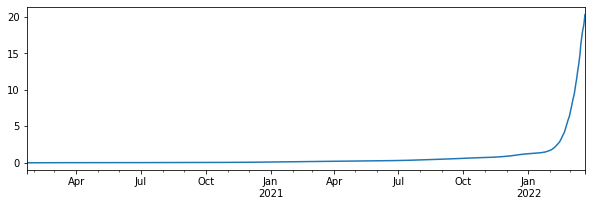

In [34]:
# put your code

## Computing $R_t$

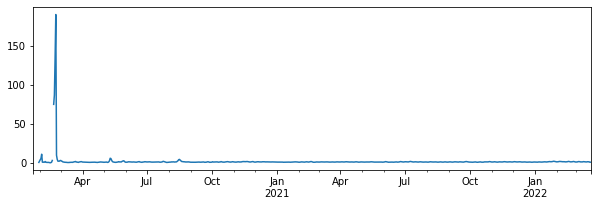

In [35]:
# put your code

Let's further look at the beginning of the pandemic. We will also limit the y-axis values to show only values below 6, in order to see better, and draw horizontal line at 1.

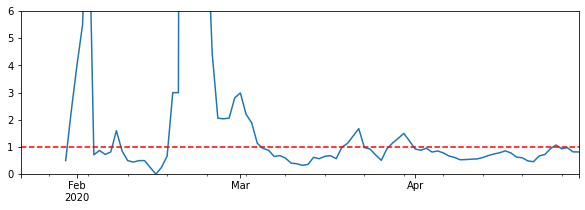

In [36]:
# put your code

Another interesting indicator of the pandemic is the **derivative**, or **daily difference** in new cases. It allows us to see clearly when pandemic is increasing or declining. 

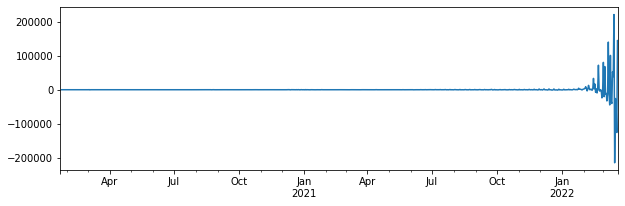

In [37]:
# put your code

Given the fact that there are a lot of fluctuations in data caused by reporting, it makes sense to smooth the curve by running rolling average to get the overall picture. Let's again focus on the first months of the pandemic:

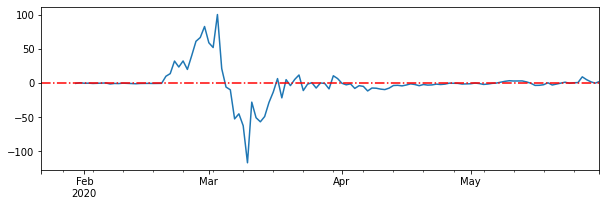

In [38]:
# put your code